# Elementos lexicomorfológicos en NLP
Un nivel fundamental de trabajo es el nivel lexico, referido a las unidades mínimas de sentido en un lenguaje (usualmente palabras, pero no necesariamente) que construyen un vocabulario. En este notebook veremos métodos de análisis lexicos con una aplicación: resumenes descriptivos de textos basados en nubes de palabras

In [1]:
import os, re, string, collections, random
import nltk
import spacy
import pandas as pd

## Importación y preparación del documento

Trabajaremos con el Nuevo Testamento de Valera. Inicialmente vamos a leerlo

In [2]:

abre=open("nuevo_testamento_valera.txt",encoding="UTF-8")
base=abre.read()
base[0:100]



'\ufeffThe Project Gutenberg EBook of Reina Valera New Testament of the Bible 1909, by \nAnonymous\n\nThis eB'

Realizaremos las siguientes limpiezas:
Primero, retiramos textos que no pertenecen al Nuevo Testamento (prefacios, notas legales)

In [3]:
init=base.find("HEBREO Y GRIEGO")
finale=base.find("The first pass")
base=base[init:finale]
base[0:2000]

'HEBREO Y GRIEGO\n\n\n\nCapítulo  1\n\n        1 EN el principio era el Verbo, y el Verbo era con Dios, y el Verbo era\nDios.\n\n        2 Este era en el principio con Dios.\n\n        3 Todas las cosas por él fueron hechas; y sin él nada de lo que es\nhecho, fué hecho.\n\n        4 En él estaba la vida, y la vida era la luz de los hombres.\n\n        5 Y la luz en las tinieblas resplandece; mas las tinieblas no la\ncomprendieron.\n\n        6 Fué un hombre enviado de Dios, el cual se llamaba Juan.\n\n        7 Este vino por testimonio, para que diese testimonio de la luz, para\nque todos creyesen por él.\n\n        8 No era él la luz, sino para que diese testimonio de la luz.\n\n        9 [Aquél] era la luz verdadera, que alumbra á todo hombre que viene á\neste mundo.\n\n        10 En el mundo estaba, y el mundo fué hecho por él; y el mundo no le\nconoció.\n\n        11 A lo suyo vino, y los suyos no le recibieron.\n\n        12 Mas á todos los que le recibieron, dióles potestad de se

Después retiramos saltos de línea y tabuladores

In [4]:
base2 = re.sub ("\n|\t"," ",base)
base2[0:2000]

'HEBREO Y GRIEGO    Capítulo  1          1 EN el principio era el Verbo, y el Verbo era con Dios, y el Verbo era Dios.          2 Este era en el principio con Dios.          3 Todas las cosas por él fueron hechas; y sin él nada de lo que es hecho, fué hecho.          4 En él estaba la vida, y la vida era la luz de los hombres.          5 Y la luz en las tinieblas resplandece; mas las tinieblas no la comprendieron.          6 Fué un hombre enviado de Dios, el cual se llamaba Juan.          7 Este vino por testimonio, para que diese testimonio de la luz, para que todos creyesen por él.          8 No era él la luz, sino para que diese testimonio de la luz.          9 [Aquél] era la luz verdadera, que alumbra á todo hombre que viene á este mundo.          10 En el mundo estaba, y el mundo fué hecho por él; y el mundo no le conoció.          11 A lo suyo vino, y los suyos no le recibieron.          12 Mas á todos los que le recibieron, dióles potestad de ser hechos hijos de Dios, á los que 

##Construcción de vocabulario
Una primera etapa para construir el vocabulario implica definir el posible uso que se le dará al mismo. En nuestro caso, para resumir textos es fundamental encontrar los conceptos. De ese modo, la distinción mayúsculas/minúsculas no es de utilidad y se retira.

In [5]:
base=base2.lower()
base[1:850]


'ebreo y griego    capítulo  1          1 en el principio era el verbo, y el verbo era con dios, y el verbo era dios.          2 este era en el principio con dios.          3 todas las cosas por él fueron hechas; y sin él nada de lo que es hecho, fué hecho.          4 en él estaba la vida, y la vida era la luz de los hombres.          5 y la luz en las tinieblas resplandece; mas las tinieblas no la comprendieron.          6 fué un hombre enviado de dios, el cual se llamaba juan.          7 este vino por testimonio, para que diese testimonio de la luz, para que todos creyesen por él.          8 no era él la luz, sino para que diese testimonio de la luz.          9 [aquél] era la luz verdadera, que alumbra á todo hombre que viene á este mundo.          10 en el mundo estaba, y el mundo fué hecho por él; y el mundo no le conoció.          11'

Después es necesario separar el texto  (**tokenizar**)  en las unidades mínimas que nos sirven, en este caso, para un wordcloud: las palabras. Obtenemos una lista de palabras al final. 

In [6]:
nltk.download("punkt")
fichas2=nltk.tokenize.word_tokenize(base,language="spanish")
print(len(fichas2)," ",type(fichas2))



[nltk_data] Downloading package punkt to /Users/habi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


32808   <class 'list'>


In [7]:
fichas2[0:100]


['hebreo',
 'y',
 'griego',
 'capítulo',
 '1',
 '1',
 'en',
 'el',
 'principio',
 'era',
 'el',
 'verbo',
 ',',
 'y',
 'el',
 'verbo',
 'era',
 'con',
 'dios',
 ',',
 'y',
 'el',
 'verbo',
 'era',
 'dios',
 '.',
 '2',
 'este',
 'era',
 'en',
 'el',
 'principio',
 'con',
 'dios',
 '.',
 '3',
 'todas',
 'las',
 'cosas',
 'por',
 'él',
 'fueron',
 'hechas',
 ';',
 'y',
 'sin',
 'él',
 'nada',
 'de',
 'lo',
 'que',
 'es',
 'hecho',
 ',',
 'fué',
 'hecho',
 '.',
 '4',
 'en',
 'él',
 'estaba',
 'la',
 'vida',
 ',',
 'y',
 'la',
 'vida',
 'era',
 'la',
 'luz',
 'de',
 'los',
 'hombres',
 '.',
 '5',
 'y',
 'la',
 'luz',
 'en',
 'las',
 'tinieblas',
 'resplandece',
 ';',
 'mas',
 'las',
 'tinieblas',
 'no',
 'la',
 'comprendieron',
 '.',
 '6',
 'fué',
 'un',
 'hombre',
 'enviado',
 'de',
 'dios',
 ',',
 'el',
 'cual']

Una buena opción es crear un libro de NLTK, el cual permite manipulaciones especiales.

In [8]:
libro1=nltk.Text(fichas2)
libro1.count("amor")


11

por ejemplo, puedo obtener el conjunto de palabras únicas (distintas) del texto

In [9]:
len(set(libro1))


3205

Ya con la informacion tokenizada, podemos obtener algunas métricas. Por ejemplo, la diversidad léxica, una medida que puede ser útil en algunos contextos como predictor.

In [10]:
diversidad_lexica=len(set(libro1))/len(libro1)
print(diversidad_lexica)

0.09768958790538892


Asi mismo, podemos obtener una descriptiva de la frecuencia de nuestro vocabulario. En general, el vocabulario de un corpus grande debería seguir la Ley de Zipf

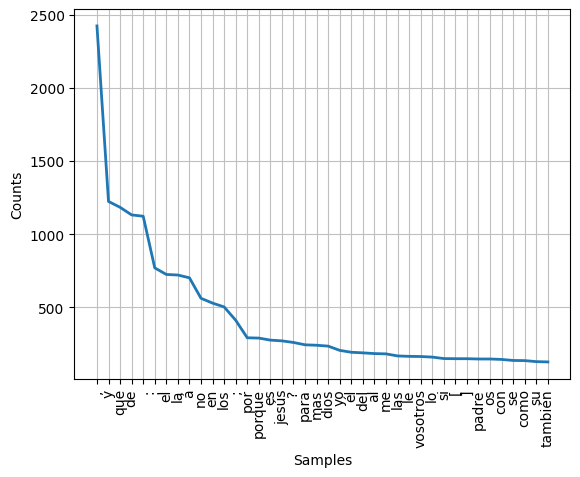

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [11]:
    freq_dist = nltk.FreqDist(libro1)
    freq_dist.plot(40,cumulative=False)

ya podemos hacer nuestro primer wordcloud

In [12]:
import numpy, matplotlib
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud



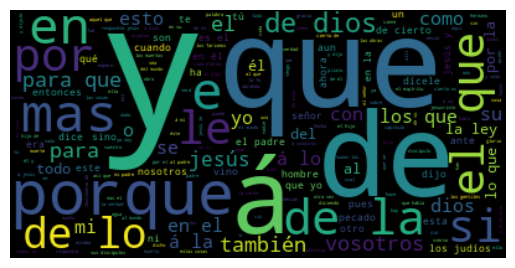

None

In [13]:
nubea=WordCloud()
nubea.generate(base)
plt.figure()
plt.imshow(nubea, interpolation="bilinear")
plt.axis("off")
figura=plt.show()
display(figura)

## Stopwords
Como resulta evidente, las solas palabras no nos muestran un resumen del texto, pues hay palabras muy frecuentes que solo ayudan a "conectar" el lenguaje, y no son relevantes para el documento específico.
UN conjunto de palabras que se desea retirar del vocabulario por razones del caso de uso es denominado "stopwords"
 NLTK tiene una lista genérica de ellas, pero los stopwords pueden variar según el problema a la mano. Veamos lo que tiene NLTK:

In [14]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords.words("spanish")

[nltk_data] Downloading package stopwords to /Users/habi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [15]:
len(stopwords.words("spanish"))


313

En nuestro caso, por ejemplo, es necesario agregar unos stopwords.

Filtramos los stopwords, es decir, los retiramos de nuestro texto.

In [16]:
filtra=[word for word in fichas2 if word not in stopwords.words("spanish")]
total=" ".join(filtra)
print(len(filtra))


19209


y creamos el wordcloud ya sin stopwords

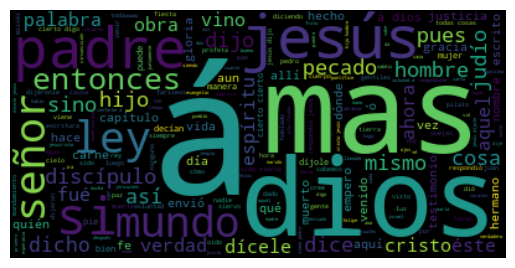

None

In [17]:
nubeb=WordCloud()
nubeb.generate(total)
plt.figure()
plt.imshow(nubeb, interpolation="bilinear")
plt.axis("off")
figura2=plt.show()
display(figura2)

Por supuesto, al ser una lista de palabras, podemos personalizarla si los resultados no son satisfactorios

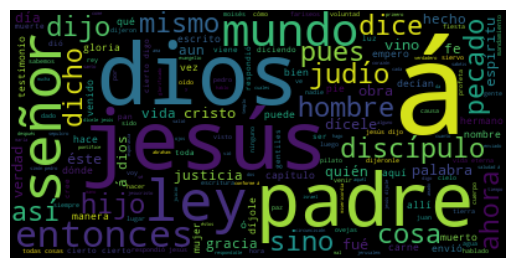

None

In [18]:
misstop=stopwords.words("spanish")+["mas","si","este","aquel"]
filtra2=[word for word in fichas2 if word not in misstop]
total2=" ".join(filtra2)
nubec=WordCloud()
nubec.generate(total2)
plt.figure()
plt.imshow(nubec, interpolation="bilinear")
plt.axis("off")
figura3=plt.show()
display(figura3)

## Lemas: en busca del significado

Como vemos en el wordcloud, algunas derivaciones de palabras (por ejemplo, conjugaciones de verbo: dijo, dijeron, o singulares y plurales) disminuyen la capacidad del wordcloud de transmitir los términos esenciales del documento. Por ello es posible utilizar algun tipo de raíz o fuente de esos términos como una opción para ampliar la interpretabilidad. Hay dos opciones fundamentales: obtener el lema de la palabra (la palabra base de diccionario) o tratar de "cortar" la palabra en su raíz. Estas opciones aumentan la exhaustividad, aunque disminuyan la precisión.

Para desarrollar el uso de lemas utilizaremos la librería spacy. Para ello es necesario importar su modelo en español y cargarlo.

In [19]:
spacy.cli.download("es")
#nlp=spacy.load("es_core_news_sm")

⚠ As of spaCy v3.0, shortcuts like 'es' are deprecated. Please use the
full pipeline package name 'es_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 42.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


Después le aplicamos el modelo a nuestro libro del nuevo testamento

In [20]:
nlp=spacy.load("es_core_news_sm")

In [21]:
doc1=nlp(base)


Una vez ejecutamos el modelo, podemos obtener una gran cantidad de información para diferentes tipos de *tokens* del texto (palabras, frases, frases nominales). En este caso, usando como *tokens* las palabras, obtenemos su lema, si es o no un stopword, si es no un signo de puntuación y si es alfanumérico.

In [22]:
morfo=[]
for x in range(1,len(doc1)):
    morfo.append([doc1[x].text, doc1[x].lemma_,doc1[x].is_stop, doc1[x].is_punct, doc1[x].is_alpha])
morfo[100:120]


[['hombre', 'hombre', False, False, True],
 ['enviado', 'enviado', False, False, True],
 ['de', 'de', True, False, True],
 ['dios', 'dio', False, False, True],
 [',', ',', False, True, False],
 ['el', 'el', True, False, True],
 ['cual', 'cual', True, False, True],
 ['se', 'él', True, False, True],
 ['llamaba', 'llamar', False, False, True],
 ['juan', 'juan', False, False, True],
 ['.', '.', False, True, False],
 ['         ', '         ', False, False, False],
 ['7', '7', False, False, False],
 ['este', 'este', True, False, True],
 ['vino', 'vino', False, False, True],
 ['por', 'por', True, False, True],
 ['testimonio', 'testimonio', False, False, True],
 [',', ',', False, True, False],
 ['para', 'para', True, False, True],
 ['que', 'que', True, False, True]]

Para crear el wordcloud creamos una base de datos de pandas.

In [23]:
palabras=pd.DataFrame(morfo)
palabras.head(20)


,0,1,2,3,4
0,y,y,True,False,True
1,griego,griego,False,False,True
2,,,False,False,False
3,capítulo,capítulo,False,False,True
4,,,False,False,False
5,1,1,False,False,False
6,,,False,False,False
7,1,1,False,False,False
8,en,en,True,False,True
9,el,el,True,False,True


Filtramos las palabras que son stopwords (para spacy), los signos de puntuación y los números.

In [24]:
#quitar stopwords
palabras=palabras[palabras[2]==False]
#quitar puntuacion
palabras=palabras[palabras[3]==False]
##quitar números
palabras=palabras[palabras[4]==True]
palabras.head(20)

,0,1,2,3,4
1,griego,griego,False,False,True
3,capítulo,capítulo,False,False,True
10,principio,principio,False,False,True
13,verbo,verbo,False,False,True
17,verbo,verbo,False,False,True
20,dios,dio,False,False,True
24,verbo,verbo,False,False,True
26,dios,dio,False,False,True
34,principio,principio,False,False,True
36,dios,dio,False,False,True


Después seguimos el proceso usual de contar tokens. Inicialmente vamos a contar las palabras, no los lemas.

In [25]:
contapal=pd.value_counts(palabras[0])
contapal2=contapal.to_frame()
contapal2.columns=["conteo"]
contapal2.index.name="entidad"
contapal2["palabra"]=contapal2.index
contapal2.head(20)


,conteo,palabra
entidad,,
á,705,á
jesús,271,jesús
dios,235,dios
padre,147,padre
señor,100,señor
ley,93,ley
mundo,88,mundo
cosas,75,cosas
hijo,71,hijo


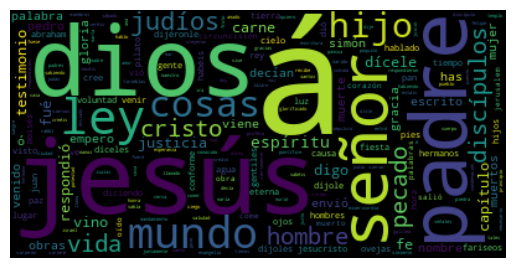

None

In [26]:
diccio={}
for freq,name in contapal2.values:
    diccio[name]=freq

nube = WordCloud()
nube.generate_from_frequencies(frequencies=diccio)
plt.figure()
plt.imshow(nube, interpolation="bilinear")
plt.axis("off")

figura3=plt.show()
display(figura3)

En el resultado es claro que la reducción de stopwords de spacy no es completa. Vamos a completarla con los stopwords de NLTK para ver el wordcloud

In [27]:
misstop=misstop+["á"]
for word in misstop:
    nlp.vocab[word].is_stop=True

doc1=nlp(base)


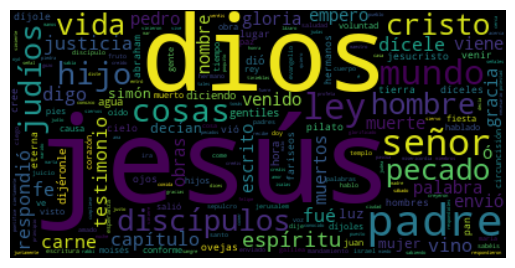

None

In [28]:
#extraer de spacy
morfo=[]
for x in range(1,len(doc1)):
    morfo.append([doc1[x].text, doc1[x].lemma_,doc1[x].is_stop, doc1[x].is_punct, doc1[x].is_alpha])
#volver dataframe
palabras=pd.DataFrame(morfo)
#quitar stopwords
palabras=palabras[palabras[2]==False]
#quitar puntuacion
palabras=palabras[palabras[3]==False]
##quitar números
palabras=palabras[palabras[4]==True]
#contar palabras y alinear índice
contapal=pd.value_counts(palabras[0])
contapal2=contapal.to_frame()
contapal2.columns=["conteo"]
contapal2.index.name="entidad"
contapal2["palabra"]=contapal2.index
#crear diccionario de frecuencias
diccio={}
for freq,name in contapal2.values:
    diccio[name]=freq
#crear el wordcloud
nube = WordCloud()
nube.generate_from_frequencies(frequencies=diccio)
plt.figure()
plt.imshow(nube, interpolation="bilinear")
plt.axis("off")
figure4=plt.show()
display(figure4)


    
    

Aqui ya resulta claro que los sustantivos se destacan más que los verbos, por el problema de las conjugaciones (digo, dícele...)
En el siguiente wordcloud cambiamos la palabra por el lema.

In [29]:
contal=pd.value_counts(palabras[1])
contal2=contal.to_frame()
contal2.head(10)
contal2.columns=["conteo"]
contal2.index.name="entidad"
contal2.index[1]


contal2["palabra"]=contal2.index
contal2.head(50)
diccio2={}
for freq,name in contal2.values:
    diccio2[name]=freq

contal=pd.value_counts(palabras[1])
contal2=contal.to_frame()
contal2.head(10)
contal2.columns=["conteo"]
contal2.index.name="entidad"
contal2["palabra"]=contal2.index
contal2.head(50)
diccio2={}
for freq,name in contal2.values:
    diccio2[name]=freq




Adicional a ello, incrustamos el wordcloud en una imagen

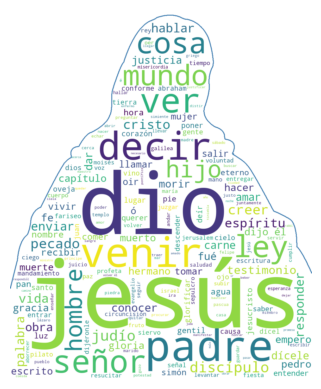

None

In [30]:
from PIL import Image
jesus_mask = numpy.array(Image.open("jesus_6.png"))
nube = WordCloud(background_color="white", mask=jesus_mask,contour_width=3, contour_color='steelblue')
nube.generate_from_frequencies(frequencies=diccio2)
plt.figure()
plt.imshow(nube, interpolation="bilinear")
plt.axis("off")
figure5=plt.show()
display(figure5)



El resultado muestra ahora como más importantes los verbos decir, creer y venir, que son claves en el análisis del nuevo testamento.

El uso de lemas es intensivo en cómputo. Una alternativa cuando el volumen es un problema es cortar las palabras por su raíz (stemming). Este mecanismo es mucho más rápido, pero tambien bastante menos preciso, y genera ambiguedades y dificultades, como veremos aquí. Primero obtenemos esas raíces:

In [31]:
filtra=[word for word in fichas2 if word not in stopwords.words("spanish")]
filtra

['hebreo',
 'griego',
 'capítulo',
 '1',
 '1',
 'principio',
 'verbo',
 ',',
 'verbo',
 'dios',
 ',',
 'verbo',
 'dios',
 '.',
 '2',
 'principio',
 'dios',
 '.',
 '3',
 'todas',
 'cosas',
 'hechas',
 ';',
 'hecho',
 ',',
 'fué',
 'hecho',
 '.',
 '4',
 'vida',
 ',',
 'vida',
 'luz',
 'hombres',
 '.',
 '5',
 'luz',
 'tinieblas',
 'resplandece',
 ';',
 'mas',
 'tinieblas',
 'comprendieron',
 '.',
 '6',
 'fué',
 'hombre',
 'enviado',
 'dios',
 ',',
 'llamaba',
 'juan',
 '.',
 '7',
 'vino',
 'testimonio',
 ',',
 'diese',
 'testimonio',
 'luz',
 ',',
 'creyesen',
 '.',
 '8',
 'luz',
 ',',
 'sino',
 'diese',
 'testimonio',
 'luz',
 '.',
 '9',
 '[',
 'aquél',
 ']',
 'luz',
 'verdadera',
 ',',
 'alumbra',
 'á',
 'hombre',
 'viene',
 'á',
 'mundo',
 '.',
 '10',
 'mundo',
 ',',
 'mundo',
 'fué',
 'hecho',
 ';',
 'mundo',
 'conoció',
 '.',
 '11',
 'vino',
 ',',
 'recibieron',
 '.',
 '12',
 'mas',
 'á',
 'recibieron',
 ',',
 'dióles',
 'potestad',
 'ser',
 'hechos',
 'hijos',
 'dios',
 ',',
 'á',
 

In [32]:
##NLTK solo stemming
from nltk.stem.snowball import SnowballStemmer
raices=SnowballStemmer("spanish")
#raizevan=[raices.stem(t) for t in filtra]
raizevan=[raices.stem(t) for t in filtra]
len(set(raizevan))



1814

Luego generamos el wordcloud con esas raíces.

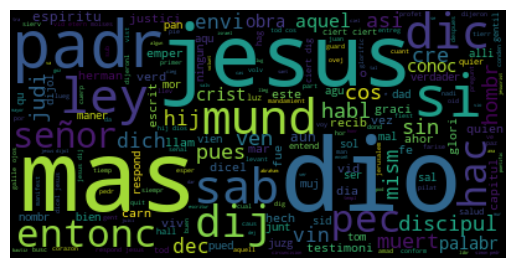

None

In [33]:

total2=" ".join(raizevan)

nubeb=WordCloud()
nubeb.generate(total2)
plt.figure()
plt.imshow(nubeb, interpolation="bilinear")
plt.axis("off")
figure6=plt.show()
display(figure6)



## N-gramas como vocabulario
En ocasiones es la combinación de palabras la que carga un significado especial. 

In [34]:
from nltk.collocations import *
from nltk import bigrams, trigrams

In [35]:
total_bigramas=nltk.FreqDist(nltk.bigrams(libro1))
len(total_bigramas)

14860

In [36]:
sacarlos=pd.DataFrame(total_bigramas.items(), columns=['word', 'frequency'])
sacarlos.head(10)

,word,frequency
0,"(hebreo, y)",1
1,"(y, griego)",1
2,"(griego, capítulo)",1
3,"(capítulo, 1)",2
4,"(1, 1)",2
5,"(1, en)",1
6,"(en, el)",94
7,"(el, principio)",5
8,"(principio, era)",1
9,"(era, el)",8


In [37]:
libro1.collocations()

los judíos; para que; otra vez; sus discípulos; estas cosas; vida
eterna; todas las; ¿por qué; está escrito; las cosas; las obras; simón
pedro; los que; los fariseos; respondió jesús; los muertos; los
gentiles; del cielo; ninguna manera; así que


En la combinación de palabras usualmente es importante filtrar por la frecuencia absoluta (support) y también por alguna métrica particular que nos extraiga los mejores (por ejemplo, PMI)

In [38]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

#sacar los bigramas
finder = BigramCollocationFinder.from_words(libro1)
finder.apply_freq_filter(5)
#encontrar los 100 de mayor PMI
bigramas_destacados=sorted(finder.nbest(bigram_measures.pmi, 100))
##encontrar con PMI > 5, otra forma de cortar. Pero no corta signos de puntuación.
bigramas_importantes=sorted(finder.above_score(bigram_measures.pmi,5))

print(bigramas_destacados)


[('al', 'sepulcro'), ('aquel', 'discípulo'), ('aquel', 'día'), ('aquel', 'lugar'), ('cada', 'uno'), ('cierto', 'os'), ('como', 'hubo'), ('da', 'testimonio'), ('da', 'vida'), ('del', 'cielo'), ('del', 'pontífice'), ('dicho', 'esto'), ('diremos', '?'), ('donde', 'estaba'), ('doy', 'testimonio'), ('día', 'postrero'), ('entre', 'tanto'), ('eres', 'tú'), ('es', 'necesario'), ('es', 'verdadero'), ('espíritu', 'santo'), ('estaba', 'allí'), ('estaba', 'cerca'), ('estas', 'cosas'), ('este', 'mundo'), ('está', 'escrito'), ('fué', 'hecho'), ('ha', 'venido'), ('había', 'hecho'), ('había', 'sido'), ('había', 'venido'), ('hasta', 'ahora'), ('hay', 'quien'), ('he', 'aquí'), ('he', 'dado'), ('he', 'dicho'), ('he', 'hablado'), ('he', 'venido'), ('hora', 'viene'), ('hubo', 'dicho'), ('las', 'cosas'), ('las', 'obras'), ('las', 'ovejas'), ('las', 'palabras'), ('las', 'ramas'), ('las', 'tinieblas'), ('les', 'dijo'), ('lo', 'bueno'), ('lo', 'malo'), ('los', 'pontífices'), ('lugar', 'donde'), ('me', 'ama'), 

In [39]:
print (bigramas_importantes)

[(':', 'rabbí'), (':', '¿a'), (':', '¿de'), ('?', '36'), ('?', 'ó'), ('[', 'vino'), ('al', 'cual'), ('al', 'mundo'), ('al', 'sepulcro'), ('allí', 'con'), ('aquel', 'discípulo'), ('aquel', 'día'), ('aquel', 'lugar'), ('así', 'también'), ('cada', 'uno'), ('cierto', 'os'), ('cierto', 'te'), ('como', 'está'), ('como', 'hubo'), ('conforme', 'á'), ('creyeron', 'en'), ('da', 'testimonio'), ('da', 'vida'), ('del', 'cielo'), ('del', 'espíritu'), ('del', 'hombre'), ('del', 'mundo'), ('del', 'pecado'), ('del', 'pontífice'), ('dicho', 'esto'), ('diciendo', ':'), ('dijéronle', ':'), ('diremos', '?'), ('donde', 'estaba'), ('donde', 'yo'), ('doy', 'testimonio'), ('día', 'postrero'), ('dícele', 'jesús'), ('díceles', 'jesús'), ('díjole', ':'), ('díjoles', ':'), ('el', 'buen'), ('en', 'medio'), ('en', 'ninguna'), ('en', 'pie'), ('entre', 'tanto'), ('entre', 'vosotros'), ('eres', 'tú'), ('es', 'necesario'), ('es', 'verdadero'), ('espíritu', 'santo'), ('estaba', 'allí'), ('estaba', 'cerca'), ('estas', 'co

Ahora vamos a obtener los bigramas que tengan palabras de 3 o más caracteres de longitud y no estén en stopwords

In [40]:
finder.apply_word_filter(lambda w: len(w) < 3 or w in misstop)
bigramas_limpios=sorted(finder.nbest(bigram_measures.pmi, 100))
print(bigramas_limpios)

[('cristo', 'jesús'), ('doy', 'testimonio'), ('día', 'postrero'), ('dícele', 'jesús'), ('díceles', 'jesús'), ('entonces', 'jesús'), ('espíritu', 'santo'), ('fué', 'hecho'), ('hora', 'viene'), ('ninguna', 'manera'), ('respondió', 'jesús'), ('respondióle', 'jesús'), ('respondióles', 'jesús'), ('simón', 'pedro'), ('vida', 'eterna')]


Ahora vamos a extraerlos para ponerlos en un wordcloud

In [41]:
scored=finder.score_ngrams(bigram_measures.pmi)
bigramas_extraidos=[] 
puntajes_bigramas=[]
for i in range(0,len(scored)):
  bigramas_extraidos.append(scored[i][0][0]+" "+scored[i][0][1])
  puntajes_bigramas.append(scored[i][1])

print(bigramas_extraidos[0:4], puntajes_bigramas[0:4])

['día postrero', 'ninguna manera', 'simón pedro', 'vida eterna'] [9.679831933439853, 9.291266645522203, 9.220400314802557, 9.027755236860159]


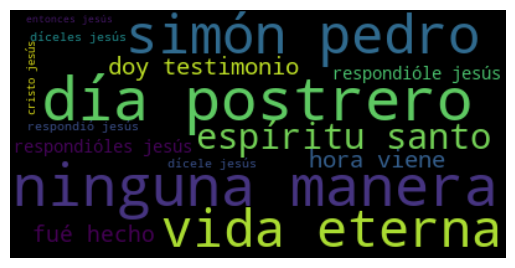

None

In [42]:
diccio3 = {bigramas_extraidos[i]: puntajes_bigramas[i] for i in range(len(bigramas_extraidos))}
#crear el wordcloud
nube = WordCloud()
nube.generate_from_frequencies(frequencies=diccio3)
plt.figure()
plt.imshow(nube, interpolation="bilinear")
plt.axis("off")
figure5=plt.show()
display(figure5)

In [43]:
#sacar los trigramas
findertr = TrigramCollocationFinder.from_words(libro1)
findertr.apply_freq_filter(2)
findertr.apply_word_filter(lambda w: len(w) < 2 or w in misstop)
#encontrar los 100 de mayor PMI
trigramas_destacados=sorted(findertr.nbest(trigram_measures.pmi, 100))

print(trigramas_destacados)

[('10', 'respondió', 'jesús'), ('cosas', 'habló', 'jesús'), ('cristo', 'jesús', 'señor'), ('dícele', 'simón', 'pedro'), ('entonces', 'jesús', 'dijo'), ('hacen', 'tales', 'cosas'), ('juan', 'dió', 'testimonio'), ('ninguno', 'puede', 'venir'), ('vino', 'pues', 'jesús'), ('¿a', 'quién', 'buscáis')]


Si se utiliza window_size busca todos los potenciales trigramas dentro de la ventana. Toma más tiempo, por supuesto.

In [44]:
#sacar los trigramas
findertr8 = TrigramCollocationFinder.from_words(libro1, window_size=8)
findertr8.apply_freq_filter(2)
findertr8.apply_word_filter(lambda w: len(w) < 2 or w in misstop)
#encontrar los 100 de mayor PMI
trigramas_destacados8=sorted(findertr8.nbest(trigram_measures.pmi, 100))

print(trigramas_destacados8)

[('17', 'paguéis', 'mal'), ('abajo', 'escribía', 'tierra'), ('abraham', 'procuráis', 'matarme'), ('acusará', 'escogidos', 'dios'), ('amo', 'apacienta', 'ovejas'), ('amo', 'dícele', 'apacienta'), ('barrabás', 'ladrón', 'capítulo'), ('bendito', 'siglos', 'amén'), ('buen', 'pastor', 'ovejas'), ('carne', 'bebe', 'sangre'), ('cinco', 'panes', 'cebada'), ('come', 'bebe', 'sangre'), ('cometiendo', 'nefandas', 'hombres'), ('comieron', 'maná', 'desierto'), ('conocieseis', 'padre', 'conocierais'), ('cosa', 'ser', 'inmunda'), ('creéis', '¿cómo', 'creeréis'), ('crucifícale', 'díceles', 'pilato'), ('crucifícale', 'díceles', 'tomadle'), ('crucifícale', 'pilato', 'tomadle'), ('dando', 'entender', 'muerte'), ('das', 'testimonio', 'verdadero'), ('dice', 'dame', 'beber'), ('dieron', 'diciendo', 'crucifícale'), ('dieron', 'quita', 'crucifícale'), ('dieron', 'voces', 'crucifícale'), ('dieron', 'voces', 'diciendo'), ('dieron', 'voces', 'quita'), ('diferencia', 'día', 'juzga'), ('doblará', 'toda', 'confesar

Puedo usar tambien el clásico chi-cuadrado, que si me marcaría una significancia

In [45]:
#sacar los bigramas
finderbichi = BigramCollocationFinder.from_words(libro1)
finderbichi.apply_freq_filter(4)
finderbichi.apply_word_filter(lambda w: len(w) < 2 or w in misstop)
#encontrar los 100 de mayor PMI
bigramas_chi=sorted(finderbichi.nbest(bigram_measures.pmi, 100))

print(bigramas_chi)

[('10', 'entonces'), ('31', 'entonces'), ('amaba', 'jesús'), ('cristo', 'jesús'), ('da', 'testimonio'), ('da', 'vida'), ('dijo', 'isaías'), ('dijo', 'jesús'), ('dió', 'testimonio'), ('doy', 'testimonio'), ('día', 'postrero'), ('dícele', 'jesús'), ('díceles', 'jesús'), ('entonces', 'jesús'), ('entonces', 'pilato'), ('espíritu', 'santo'), ('fué', 'hecho'), ('hora', 'viene'), ('jesús', 'dijo'), ('jesús', 'señor'), ('ninguna', 'manera'), ('pues', 'jesús'), ('quiere', 'decir'), ('respondió', 'jesús'), ('respondióle', 'jesús'), ('respondióles', 'jesús'), ('sabiendo', 'jesús'), ('señor', 'jesucristo'), ('sido', 'ciego'), ('siguiente', 'día'), ('simón', 'pedro'), ('subió', 'jesús'), ('vida', 'eterna'), ('¿cómo', 'puede'), ('¿de', 'dónde'), ('¿me', 'amas'), ('¿qué', 'pues')]


# Vocabularios especializados
El vocabulario no debe ser necesariamente todos los tokens de un texto. Asi como se filtran los stopwords, pueden extraerse de un listado. 

In [46]:
tempname=pd.read_excel("nombres_espanol_200.xlsx")
nombres_espanol=tempname["Nombre"].tolist()
nombres_espanol

['José',
 'Juan',
 'Carlos',
 'Luis',
 'Antonio',
 'Francisco',
 'Manuel',
 'Pedro',
 'Miguel',
 'Fernando',
 'Jorge',
 'Enrique',
 'Pablo',
 'Felipe',
 'Salvador',
 'Javier',
 'Martín',
 'Rafael',
 'Alberto',
 'Ángel',
 'Alejandro',
 'Diego',
 'Eduardo',
 'Alfonso',
 'Vicente',
 'Julio',
 'Ricardo',
 'Andrés',
 'Ramón',
 'Roberto',
 'Guillermo',
 'Domingo',
 'Ignacio',
 'César',
 'Víctor',
 'Raúl',
 'Jaime',
 'Joaquín',
 'Nicolás',
 'Hugo',
 'Alfredo',
 'Mariano',
 'Gabriel',
 'Marcos',
 'Lorenzo',
 'Tomás',
 'Rodrigo',
 'Federico',
 'Arturo',
 'Emilio',
 'Agustín',
 'Gustavo',
 'Ernesto',
 'Félix',
 'Esteban',
 'Benito',
 'Rubén',
 'Lucas',
 'Gonzalo',
 'Cristóbal',
 'Bernardo',
 'Augusto',
 'Gregorio',
 'Adolfo',
 'Iván',
 'Bautista',
 'Samuel',
 'Rodolfo',
 'Simón',
 'Humberto',
 'Julián',
 'Mateo',
 'Claudio',
 'Justo',
 'Isidro',
 'Lázaro',
 'Fidel',
 'Elías',
 'Jerónimo',
 'Eugenio',
 'Clemente',
 'Román',
 'Bartolomé',
 'Pascual',
 'Abraham',
 'Roque',
 'Abel',
 'Germán',
 'Isa

Note que para este caso de uso, con el fin de disminuir ambiguedades, el uso de mayúsculas puede ser clave.

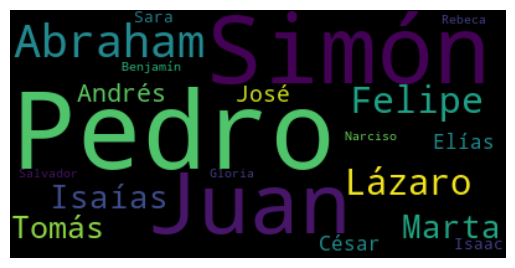

None

In [47]:
fichasmay=nltk.tokenize.word_tokenize(base2,language="spanish")
filtranombre=[word for word in fichasmay if word in nombres_espanol]
libronomb=nltk.Text(filtranombre)
freqpal=nltk.FreqDist(libronomb)
nombresfreq=pd.DataFrame(freqpal.items(), columns=['nombre', 'frecuencia'])
#nombresfreq.head(50)

diccionombre={}
for nombre,frecuencia in nombresfreq.values:
    diccionombre[nombre]=frecuencia


nubenombre = WordCloud()
nubenombre.generate_from_frequencies(frequencies=diccionombre)
plt.figure()
plt.imshow(nubenombre, interpolation="bilinear")
plt.axis("off")
figurenombre=plt.show()
display(figurenombre)
